In [68]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence  import variance_inflation_factor

from sklearn.linear_model import LinearRegression ,Lasso ,Ridge
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
from scipy.stats import shapiro ,kstest , normaltest

import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

import pickle
import json

### problem statement 

In [ ]:
to predict price of insurance 
'age',
'gender',
'bmi', 
'children',
'smoker', 
'region'

## 2. data gathering

In [2]:
df=pd.read_csv("medical_insurance.csv")
df

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## 3.Exploratory data analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 4.feature engineering 

In [5]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.isna().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [9]:
df["gender"].value_counts()

male      676
female    662
Name: gender, dtype: int64

In [10]:
df["gender"]=df["gender"].replace({"male":0,"female":1})
df["gender"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: gender, Length: 1338, dtype: int64

<AxesSubplot: xlabel='bmi'>

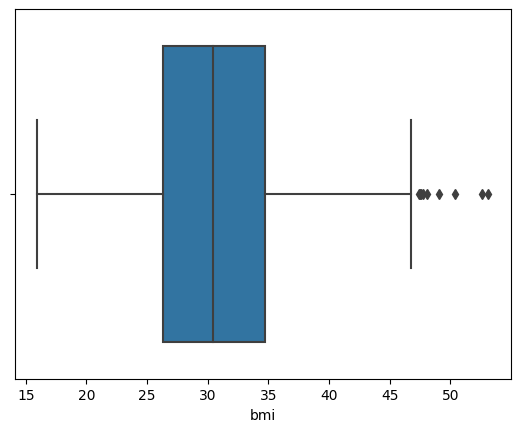

In [11]:
sns.boxplot(x=df["bmi"])

In [12]:
df["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [13]:
df["bmi"].median()

30.4

In [14]:
df.describe()

,age,gender,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,13270.422265
std,14.049960,0.500160,6.098187,1.205493,12110.011237
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,63770.428010


In [15]:
df["smoker"].value_counts().to_dict()

{'no': 1064, 'yes': 274}

In [16]:
df["smoker"]=df["smoker"].replace({'no': 0, 'yes': 1})
df["smoker"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [18]:
df["region"].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [19]:
df=pd.get_dummies(df,columns=["region"])
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   gender            1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


## 5.features selection

In [21]:
x=df.drop("charges",axis=1)
x.shape

(1338, 9)

In [22]:
vif_list = []
for i in range(x.shape[1]):
    vif=variance_inflation_factor(x,i)
    vif_list.append(f"vif for {x.columns[i]} is {vif}")
vif_list

['vif for age is 1.0168221490038107',
 'vif for gender is 1.0089001621005733',
 'vif for bmi is 1.1066297324286172',
 'vif for children is 1.0040106421370243',
 'vif for smoker is 1.0120736649061481',
 'vif for region_northeast is 8.810361912169732',
 'vif for region_northwest is 8.855810965091548',
 'vif for region_southeast is 11.779149322157394',
 'vif for region_southwest is 9.436480190645842']

In [23]:
df.head()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


In [24]:
x=df.drop("charges",axis=1)
y=df["charges"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
x_train

,age,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
559,19,0,35.530,0,0,0,1,0,0
273,50,0,27.455,1,0,1,0,0,0
471,18,1,30.115,0,0,1,0,0,0
22,18,0,34.100,0,0,0,0,1,0
939,53,0,29.480,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
1180,42,1,41.325,1,0,1,0,0,0
1147,20,1,31.920,0,0,0,1,0,0
527,51,1,25.800,1,0,0,0,0,1
1149,42,0,34.100,0,0,0,0,0,1


## 6.Model selection

In [25]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

## 7.evalution

In [26]:
y_pred_train=linear_model.predict(x_train)
y_pred_train[10:20]

array([ 9075.38747232, 35231.16410856, -2665.63770257,  2515.78747755,
       13442.01007294,  9301.67240753, 31809.14290585,  1218.06634603,
        4424.60420111,  9993.56246135])

In [27]:
y_train[10:20]

151      7789.63500
1090    41676.08110
172      1694.79640
751      1906.35825
510     11763.00090
229      9225.25640
85      21098.55405
636      2709.11190
971      4992.37640
325      6600.20595
Name: charges, dtype: float64

In [28]:
## training data evalution
mse=mean_squared_error(y_train,y_pred_train)
print("mean sq error : ",mse)

rmse = np.sqrt(mse)
print("root mean sq : ", rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r_squared = r2_score(y_train,y_pred_train)
print("R2 Score :",r_squared)

mean sq error :  35000135.31385897
root mean sq :  5916.091219196926
MAE : 4080.1255429909834
R2 Score : 0.7636624681782705


In [29]:
# Testing Data Evaluation

y_pred = linear_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred )
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r_squared = r2_score(y_test,y_pred)
print("R2 Score :",r_squared)

MSE : 42730364.683872476
RMSE : 6536.84669270073
MAE : 4555.0985825133685
R2 Score : 0.6953286838318304


In [30]:
x=df[["age","gender","bmi","children","smoker"]]
y=df["charges"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)
x_train

,age,gender,bmi,children,smoker
559,19,0,35.530,0,0
273,50,0,27.455,1,0
471,18,1,30.115,0,0
22,18,0,34.100,0,0
939,53,0,29.480,0,0
...,...,...,...,...,...
1180,42,1,41.325,1,0
1147,20,1,31.920,0,0
527,51,1,25.800,1,0
1149,42,0,34.100,0,0


In [68]:
rf_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [69]:
y_pred_train=linear_model.predict(x_train)
y_pred_train[10:20]

array([ 9566.13082471, 35586.77468923, -2881.34095229,  2304.43210885,
       13003.18317882,  8955.35928657, 31650.59867681,  1061.33209358,
        4095.36575727,  9520.8054508 ])

In [71]:
## training data evalution
mse=mean_squared_error(y_train,y_pred_train)
print("mean sq error : ",mse)

rmse = np.sqrt(mse)
print("root mean sq : ", rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r_squared = r2_score(y_train,y_pred_train)
print("R2 Score :",r_squared)

mean sq error :  35118490.756364614
root mean sq :  5926.085618379523
MAE : 4087.207206802629
R2 Score : 0.7628632760349083


In [72]:
# Testing Data Evaluation

y_pred = linear_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred )
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r_squared = r2_score(y_test,y_pred)
print("R2 Score :",r_squared)

MSE : 43053689.11402194
RMSE : 6561.53100381473
MAE : 4580.7851142559775
R2 Score : 0.6930233517708537


In [73]:
ridge_model = Ridge(alpha= 0.15)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.15)

In [74]:
# Training Data Evaluation

y_pred_train = ridge_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train )
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r_squared = r2_score(y_train,y_pred_train)
print("R2 Score :",r_squared)

MSE : 35118561.795408845
RMSE : 5926.091612134329
MAE : 4088.711089154857
R2 Score : 0.7628627963455521


In [75]:
# Testing Data Evaluation

y_pred = ridge_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred )
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r_squared = r2_score(y_test,y_pred)
print("R2 Score :",r_squared)

MSE : 43044700.469526276
RMSE : 6560.846017818607
MAE : 4581.696867099451
R2 Score : 0.6930874416088255


In [76]:
lasso_model = Lasso(alpha= 0.05)
lasso_model.fit(x_train, y_train)

Lasso(alpha=0.05)

In [77]:
# Training Data Evaluation

y_pred_train = lasso_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train )
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r_squared = r2_score(y_train,y_pred_train)
print("R2 Score :",r_squared)

MSE : 35118490.78631557
RMSE : 5926.085620906567
MAE : 4087.226306002489
R2 Score : 0.7628632758326652


In [78]:
# Testing Data Evaluation

y_pred = lasso_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred )
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r_squared = r2_score(y_test,y_pred)
print("R2 Score :",r_squared)

MSE : 43053453.09755425
RMSE : 6561.513018927437
MAE : 4580.786756099448
R2 Score : 0.6930250345893455


In [32]:
dt_reg = DecisionTreeRegressor(random_state=12)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=12)

In [33]:
# Testing Data Evaluation

y_pred = dt_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred )
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r_squared = r2_score(y_test,y_pred)
print("R2 Score :",r_squared)

MSE : 50208244.104974784
RMSE : 7085.777593530211
MAE : 3590.790543246268
R2 Score : 0.6420107357583849


In [34]:
# Training Data Evaluation

y_pred_train = dt_reg.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train )
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r_squared = r2_score(y_train,y_pred_train)
print("R2 Score :",r_squared)

MSE : 0.0
RMSE : 0.0
MAE : 0.0
R2 Score : 1.0


## Hyerparameter Tuning

In [36]:
dt_reg = DecisionTreeRegressor(random_state=12)

hyp = { 'criterion' : ['mse','mae'],
       'max_depth' : np.arange(4,10),
        'min_samples_split': np.arange(4,20),
       'min_samples_leaf' : np.arange(3,10)
        }

gscv_dt_reg = GridSearchCV(dt_reg,hyp, cv = 5)
gscv_dt_reg.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=12),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [37]:
# Testing Data Evaluation
# dt_reg = DecisionTreeRegressor(random_state=12)
dt_reg = gscv_dt_reg.best_estimator_

dt_reg.fit(x_train, y_train)

y_pred = dt_reg.predict(x_test)
mse = mean_squared_error(y_test,y_pred )
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r_squared = r2_score(y_test,y_pred)
print("R2 Score :",r_squared)

MSE : 27120260.68896532
RMSE : 5207.711655704962
MAE : 2163.1608052052243
R2 Score : 0.8066301193528191


In [38]:
# Training Data Evaluation

y_pred_train = dt_reg.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train )
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r_squared = r2_score(y_train,y_pred_train)
print("R2 Score :",r_squared)

MSE : 18851586.320483763
RMSE : 4341.841351371992
MAE : 1554.50312087757
R2 Score : 0.872705138367187


In [58]:
rf_reg = RandomForestRegressor(random_state=45)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=45)

In [59]:
# Test Data Evaluation

y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared :",r2_value)

MSE : 27308481.097705457
RMSE : 5225.751725609001
MAE : 2815.408217723693
R-Squared : 0.8052880910297562


In [61]:
# Train Data Evaluation

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared :",r2_value)

MSE : 3361361.1045110864
RMSE : 1833.4015120837787
MAE : 984.1566037187662
R-Squared : 0.9773024938367267


In [62]:
# Our model is overfitted because we get 97% accuracy on training data and 80% on testing data 

In [63]:
### Hyperparameter Tuning for Random Forest

In [64]:
rf_reg = RandomForestRegressor(max_features='auto',
                                bootstrap=True,
                                oob_score=True,
                                n_jobs=-1,
                                random_state=11)

hyperparameters = {
    'n_estimators' : np.arange(10,150),
    'criterion' : ['mse','mae'],
    'max_depth' : np.arange(2,8),
    'min_samples_split' : np.arange(3,15),
    'min_samples_leaf' : np.arange(2,10)
    }

# gscv_rf_clf = GridSearchCV(rf_clf, hyperparameters, cv = 5)
rscv_rf_reg = RandomizedSearchCV(rf_reg, hyperparameters, cv = 5)

rscv_rf_reg.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_features='auto',
                                                   n_jobs=-1, oob_score=True,
                                                   random_state=11),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  1...
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149])})

In [65]:
# Test Data Evaluation

rf_reg_model = rscv_rf_reg.best_estimator_
rf_reg_model.fit(x_train, y_train)

y_pred = rf_reg_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared :",r2_value)

MSE : 25273618.556505065
RMSE : 5027.2873954554325
MAE : 2074.4926235507382
R-Squared : 0.8197968426689113


In [66]:
# Train Data Evaluation

y_pred_train = rf_reg_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :", mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared :",r2_value)

MSE : 16807299.54322609
RMSE : 4099.670662775986
MAE : 1504.637772686752
R-Squared : 0.8865091333215027


In [ ]:
# Here we get best accuarcy on Linear Regression so we selected Linear Regression model for our project